In [17]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:85% !important; }</style>"))

In [18]:
import os
import pandas as pd
from termcolor import colored
import numpy as np
from collections import OrderedDict
from collections import Counter
import matplotlib.pyplot as plt
from natsort import natsorted
import sys
import pickle
import seaborn as sns

# Display pandas df without truncation
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

np.set_printoptions(edgeitems=30, linewidth=100000, formatter=dict(float=lambda x: "%.3g" % x))



## Simple boxplot func

In [60]:
green_diamond = dict(markerfacecolor='g', marker='D')

def simple_boxplot(my_dict, fig_name, save_flag):
    fig, ax = plt.subplots(figsize=(20, 5), dpi=80)
    ax.boxplot(my_dict.values(), flierprops=green_diamond)
    ax.set_xticklabels(my_dict.keys())
    plt.ylim(-1)
    plt.tight_layout()
    if save_flag:
        plt.savefig(fig_name+'.png')

In [27]:
num_robot = 48
experiment_time = 1800
num_run = 100

In [70]:
# results_folder = '/home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/standAlone/results/standalone_circular'
results_folder = '/home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/standAlone/results/timeout_respawn_study_red'
# results_folder = '/home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/standAlone/results/timeout_respawn_study_blue'

In [71]:
if not os.path.isdir(results_folder):
    print(colored("Error, " + results_folder + " does not exist", 'red'))
else:
    print(colored("OK, " + results_folder + " exists", 'green'))

OK, /home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/standAlone/results/timeout_respawn_study_red exists


In [43]:
completed_task_label = ["time", "areaID", "creation_time", "completion_time", "type", "kID_on_top", "kIDs"]

## Completed areas per kilobot

In [44]:
completed_task_dict = {}

timeout = -1
respawn = -1
for timeout_folder in natsorted(os.listdir(os.path.join(results_folder))):
    print(colored("Timeout folder:", 'blue'),timeout_folder)
    
    parameters = timeout_folder.split("_")
    
    for param in parameters:
        if param.startswith("timeout"):
            print(param.split("#")[-1])
            timeout = int(param.split("#")[-1]) * 10
            print("\ttimeout:",timeout)
        elif param.startswith("respawn"):
#           print(param.split("#")[-1])
            respawn = int(param.split("#")[-1])
            print("\trespawn:",respawn)
    
#     if timeout == 20 :
#         break
        
    if timeout == -1 :
        print(colored("\tWARNING: wrong timeout folder", 'green'))
        continue
    if respawn == -1 :
        print(colored("\tWARNING: wrong timeout folder", 'green'))
        continue

    completed_task_count = []
    for filename in os.listdir(os.path.join(results_folder, timeout_folder)):
        if filename.endswith("completed_taskLOG.tsv"):
            if not os.path.getsize(os.path.join(results_folder, timeout_folder, filename)) > 0:
                print(colored("\tWARNING, empty file at:" + filename, 'red'))
                continue
            print('\tfilename: ', filename)
            
            df_completedTask = pd.read_csv(os.path.join(results_folder, timeout_folder, filename), sep="\t", header=None)
            df_completedTask.columns = completed_task_label
            completed_area_kIDs = np.array([]).astype(int)
            for area in df_completedTask["kIDs"].values:
            #     print(np.fromstring(area, dtype=int, sep=','))
                completed_area_kIDs = np.append(completed_area_kIDs, np.fromstring(area, dtype=int, sep=','))
            counter = Counter(completed_area_kIDs)
            
            for i in np.arange(num_robot):
                if i not in counter.keys():
#                     print(i)
                    counter[i] = 0
                    
            completed_task_count += list(counter.values())
#             print(elapsed_timeout_count)
    
    if len(completed_task_count):
        completed_task_dict[str(timeout)+","+str(respawn)] = completed_task_count
    else:
        print(colored("\tWARNING: empty list!!", 'green'))
        completed_task_dict[str(timeout)+","+str(respawn)] = [0] * num_robot * num_run
            


Timeout folder: TimeoutRespawnExp_2021-06-25_robots#48_timeout#1_respawn#10_redAreas#16_1800#seconds
1
	timeout: 10
	respawn: 10
	filename:  seed#43_completed_taskLOG.tsv
	filename:  seed#11_completed_taskLOG.tsv
	filename:  seed#3_completed_taskLOG.tsv
	filename:  seed#75_completed_taskLOG.tsv
	filename:  seed#14_completed_taskLOG.tsv
	filename:  seed#58_completed_taskLOG.tsv
	filename:  seed#84_completed_taskLOG.tsv
	filename:  seed#13_completed_taskLOG.tsv
	filename:  seed#62_completed_taskLOG.tsv
	filename:  seed#21_completed_taskLOG.tsv
	filename:  seed#65_completed_taskLOG.tsv
	filename:  seed#76_completed_taskLOG.tsv
	filename:  seed#57_completed_taskLOG.tsv
	filename:  seed#64_completed_taskLOG.tsv
	filename:  seed#68_completed_taskLOG.tsv
	filename:  seed#48_completed_taskLOG.tsv
	filename:  seed#32_completed_taskLOG.tsv
	filename:  seed#47_completed_taskLOG.tsv
	filename:  seed#94_completed_taskLOG.tsv
	filename:  seed#79_completed_taskLOG.tsv
	filename:  seed#63_completed_ta

	filename:  seed#86_completed_taskLOG.tsv
	filename:  seed#97_completed_taskLOG.tsv
	filename:  seed#36_completed_taskLOG.tsv
	filename:  seed#17_completed_taskLOG.tsv
	filename:  seed#12_completed_taskLOG.tsv
	filename:  seed#56_completed_taskLOG.tsv
	filename:  seed#52_completed_taskLOG.tsv
	filename:  seed#44_completed_taskLOG.tsv
	filename:  seed#35_completed_taskLOG.tsv
	filename:  seed#15_completed_taskLOG.tsv
	filename:  seed#19_completed_taskLOG.tsv
	filename:  seed#39_completed_taskLOG.tsv
	filename:  seed#73_completed_taskLOG.tsv
	filename:  seed#72_completed_taskLOG.tsv
	filename:  seed#30_completed_taskLOG.tsv
	filename:  seed#6_completed_taskLOG.tsv
	filename:  seed#46_completed_taskLOG.tsv
	filename:  seed#90_completed_taskLOG.tsv
	filename:  seed#8_completed_taskLOG.tsv
	filename:  seed#1_completed_taskLOG.tsv
Timeout folder: TimeoutRespawnExp_2021-06-25_robots#48_timeout#1_respawn#120_redAreas#16_1800#seconds
1
	timeout: 10
	respawn: 120
	filename:  seed#43_completed_ta

	filename:  seed#20_completed_taskLOG.tsv
	filename:  seed#37_completed_taskLOG.tsv
	filename:  seed#91_completed_taskLOG.tsv
	filename:  seed#77_completed_taskLOG.tsv
	filename:  seed#67_completed_taskLOG.tsv
	filename:  seed#66_completed_taskLOG.tsv
	filename:  seed#28_completed_taskLOG.tsv
	filename:  seed#49_completed_taskLOG.tsv
	filename:  seed#41_completed_taskLOG.tsv
	filename:  seed#22_completed_taskLOG.tsv
	filename:  seed#78_completed_taskLOG.tsv
	filename:  seed#93_completed_taskLOG.tsv
	filename:  seed#45_completed_taskLOG.tsv
	filename:  seed#92_completed_taskLOG.tsv
	filename:  seed#89_completed_taskLOG.tsv
	filename:  seed#50_completed_taskLOG.tsv
	filename:  seed#80_completed_taskLOG.tsv
	filename:  seed#82_completed_taskLOG.tsv
	filename:  seed#53_completed_taskLOG.tsv
	filename:  seed#70_completed_taskLOG.tsv
	filename:  seed#51_completed_taskLOG.tsv
	filename:  seed#74_completed_taskLOG.tsv
	filename:  seed#40_completed_taskLOG.tsv
	filename:  seed#87_completed_task

	filename:  seed#19_completed_taskLOG.tsv
	filename:  seed#39_completed_taskLOG.tsv
	filename:  seed#73_completed_taskLOG.tsv
	filename:  seed#72_completed_taskLOG.tsv
	filename:  seed#30_completed_taskLOG.tsv
	filename:  seed#6_completed_taskLOG.tsv
	filename:  seed#46_completed_taskLOG.tsv
	filename:  seed#90_completed_taskLOG.tsv
	filename:  seed#8_completed_taskLOG.tsv
	filename:  seed#1_completed_taskLOG.tsv
Timeout folder: TimeoutRespawnExp_2021-06-25_robots#48_timeout#3_respawn#10_redAreas#16_1800#seconds
3
	timeout: 30
	respawn: 10
	filename:  seed#43_completed_taskLOG.tsv
	filename:  seed#11_completed_taskLOG.tsv
	filename:  seed#3_completed_taskLOG.tsv
	filename:  seed#75_completed_taskLOG.tsv
	filename:  seed#14_completed_taskLOG.tsv
	filename:  seed#58_completed_taskLOG.tsv
	filename:  seed#84_completed_taskLOG.tsv
	filename:  seed#13_completed_taskLOG.tsv
	filename:  seed#62_completed_taskLOG.tsv
	filename:  seed#21_completed_taskLOG.tsv
	filename:  seed#65_completed_taskL

	filename:  seed#68_completed_taskLOG.tsv
	filename:  seed#48_completed_taskLOG.tsv
	filename:  seed#32_completed_taskLOG.tsv
	filename:  seed#47_completed_taskLOG.tsv
	filename:  seed#94_completed_taskLOG.tsv
	filename:  seed#79_completed_taskLOG.tsv
	filename:  seed#63_completed_taskLOG.tsv
	filename:  seed#27_completed_taskLOG.tsv
	filename:  seed#100_completed_taskLOG.tsv
	filename:  seed#98_completed_taskLOG.tsv
	filename:  seed#96_completed_taskLOG.tsv
	filename:  seed#18_completed_taskLOG.tsv
	filename:  seed#33_completed_taskLOG.tsv
	filename:  seed#16_completed_taskLOG.tsv
	filename:  seed#24_completed_taskLOG.tsv
	filename:  seed#25_completed_taskLOG.tsv
	filename:  seed#29_completed_taskLOG.tsv
	filename:  seed#10_completed_taskLOG.tsv
	filename:  seed#31_completed_taskLOG.tsv
	filename:  seed#83_completed_taskLOG.tsv
	filename:  seed#95_completed_taskLOG.tsv
	filename:  seed#20_completed_taskLOG.tsv
	filename:  seed#37_completed_taskLOG.tsv
	filename:  seed#91_completed_tas

	filename:  seed#22_completed_taskLOG.tsv
	filename:  seed#78_completed_taskLOG.tsv
	filename:  seed#93_completed_taskLOG.tsv
	filename:  seed#45_completed_taskLOG.tsv
	filename:  seed#92_completed_taskLOG.tsv
	filename:  seed#89_completed_taskLOG.tsv
	filename:  seed#50_completed_taskLOG.tsv
	filename:  seed#80_completed_taskLOG.tsv
	filename:  seed#82_completed_taskLOG.tsv
	filename:  seed#53_completed_taskLOG.tsv
	filename:  seed#70_completed_taskLOG.tsv
	filename:  seed#51_completed_taskLOG.tsv
	filename:  seed#74_completed_taskLOG.tsv
	filename:  seed#40_completed_taskLOG.tsv
	filename:  seed#87_completed_taskLOG.tsv
	filename:  seed#60_completed_taskLOG.tsv
	filename:  seed#54_completed_taskLOG.tsv
	filename:  seed#38_completed_taskLOG.tsv
	filename:  seed#99_completed_taskLOG.tsv
	filename:  seed#55_completed_taskLOG.tsv
	filename:  seed#42_completed_taskLOG.tsv
	filename:  seed#5_completed_taskLOG.tsv
	filename:  seed#81_completed_taskLOG.tsv
	filename:  seed#71_completed_taskL

	filename:  seed#45_completed_taskLOG.tsv
	filename:  seed#92_completed_taskLOG.tsv
	filename:  seed#89_completed_taskLOG.tsv
	filename:  seed#50_completed_taskLOG.tsv
	filename:  seed#80_completed_taskLOG.tsv
	filename:  seed#82_completed_taskLOG.tsv
	filename:  seed#53_completed_taskLOG.tsv
	filename:  seed#70_completed_taskLOG.tsv
	filename:  seed#51_completed_taskLOG.tsv
	filename:  seed#74_completed_taskLOG.tsv
	filename:  seed#40_completed_taskLOG.tsv
	filename:  seed#87_completed_taskLOG.tsv
	filename:  seed#60_completed_taskLOG.tsv
	filename:  seed#54_completed_taskLOG.tsv
	filename:  seed#38_completed_taskLOG.tsv
	filename:  seed#99_completed_taskLOG.tsv
	filename:  seed#55_completed_taskLOG.tsv
	filename:  seed#42_completed_taskLOG.tsv
	filename:  seed#5_completed_taskLOG.tsv
	filename:  seed#81_completed_taskLOG.tsv
	filename:  seed#71_completed_taskLOG.tsv
	filename:  seed#85_completed_taskLOG.tsv
	filename:  seed#23_completed_taskLOG.tsv
	filename:  seed#7_completed_taskLO

	filename:  seed#53_completed_taskLOG.tsv
	filename:  seed#70_completed_taskLOG.tsv
	filename:  seed#51_completed_taskLOG.tsv
	filename:  seed#74_completed_taskLOG.tsv
	filename:  seed#40_completed_taskLOG.tsv
	filename:  seed#87_completed_taskLOG.tsv
	filename:  seed#60_completed_taskLOG.tsv
	filename:  seed#54_completed_taskLOG.tsv
	filename:  seed#38_completed_taskLOG.tsv
	filename:  seed#99_completed_taskLOG.tsv
	filename:  seed#55_completed_taskLOG.tsv
	filename:  seed#42_completed_taskLOG.tsv
	filename:  seed#5_completed_taskLOG.tsv
	filename:  seed#81_completed_taskLOG.tsv
	filename:  seed#71_completed_taskLOG.tsv
	filename:  seed#85_completed_taskLOG.tsv
	filename:  seed#23_completed_taskLOG.tsv
	filename:  seed#7_completed_taskLOG.tsv
	filename:  seed#61_completed_taskLOG.tsv
	filename:  seed#59_completed_taskLOG.tsv
	filename:  seed#4_completed_taskLOG.tsv
	filename:  seed#34_completed_taskLOG.tsv
	filename:  seed#26_completed_taskLOG.tsv
	filename:  seed#69_completed_taskLOG

	filename:  seed#45_completed_taskLOG.tsv
	filename:  seed#92_completed_taskLOG.tsv
	filename:  seed#89_completed_taskLOG.tsv
	filename:  seed#50_completed_taskLOG.tsv
	filename:  seed#80_completed_taskLOG.tsv
	filename:  seed#82_completed_taskLOG.tsv
	filename:  seed#53_completed_taskLOG.tsv
	filename:  seed#70_completed_taskLOG.tsv
	filename:  seed#51_completed_taskLOG.tsv
	filename:  seed#74_completed_taskLOG.tsv
	filename:  seed#40_completed_taskLOG.tsv
	filename:  seed#87_completed_taskLOG.tsv
	filename:  seed#60_completed_taskLOG.tsv
	filename:  seed#54_completed_taskLOG.tsv
	filename:  seed#38_completed_taskLOG.tsv
	filename:  seed#99_completed_taskLOG.tsv
	filename:  seed#55_completed_taskLOG.tsv
	filename:  seed#42_completed_taskLOG.tsv
	filename:  seed#5_completed_taskLOG.tsv
	filename:  seed#81_completed_taskLOG.tsv
	filename:  seed#71_completed_taskLOG.tsv
	filename:  seed#85_completed_taskLOG.tsv
	filename:  seed#23_completed_taskLOG.tsv
	filename:  seed#7_completed_taskLO

	filename:  seed#53_completed_taskLOG.tsv
	filename:  seed#70_completed_taskLOG.tsv
	filename:  seed#51_completed_taskLOG.tsv
	filename:  seed#74_completed_taskLOG.tsv
	filename:  seed#40_completed_taskLOG.tsv
	filename:  seed#87_completed_taskLOG.tsv
	filename:  seed#60_completed_taskLOG.tsv
	filename:  seed#54_completed_taskLOG.tsv
	filename:  seed#38_completed_taskLOG.tsv
	filename:  seed#99_completed_taskLOG.tsv
	filename:  seed#55_completed_taskLOG.tsv
	filename:  seed#42_completed_taskLOG.tsv
	filename:  seed#5_completed_taskLOG.tsv
	filename:  seed#81_completed_taskLOG.tsv
	filename:  seed#71_completed_taskLOG.tsv
	filename:  seed#85_completed_taskLOG.tsv
	filename:  seed#23_completed_taskLOG.tsv
	filename:  seed#7_completed_taskLOG.tsv
	filename:  seed#61_completed_taskLOG.tsv
	filename:  seed#59_completed_taskLOG.tsv
	filename:  seed#4_completed_taskLOG.tsv
	filename:  seed#34_completed_taskLOG.tsv
	filename:  seed#26_completed_taskLOG.tsv
	filename:  seed#69_completed_taskLOG

	filename:  seed#22_completed_taskLOG.tsv
	filename:  seed#78_completed_taskLOG.tsv
	filename:  seed#93_completed_taskLOG.tsv
	filename:  seed#45_completed_taskLOG.tsv
	filename:  seed#92_completed_taskLOG.tsv
	filename:  seed#89_completed_taskLOG.tsv
	filename:  seed#50_completed_taskLOG.tsv
	filename:  seed#80_completed_taskLOG.tsv
	filename:  seed#82_completed_taskLOG.tsv
	filename:  seed#53_completed_taskLOG.tsv
	filename:  seed#70_completed_taskLOG.tsv
	filename:  seed#51_completed_taskLOG.tsv
	filename:  seed#74_completed_taskLOG.tsv
	filename:  seed#40_completed_taskLOG.tsv
	filename:  seed#87_completed_taskLOG.tsv
	filename:  seed#60_completed_taskLOG.tsv
	filename:  seed#54_completed_taskLOG.tsv
	filename:  seed#38_completed_taskLOG.tsv
	filename:  seed#99_completed_taskLOG.tsv
	filename:  seed#55_completed_taskLOG.tsv
	filename:  seed#42_completed_taskLOG.tsv
	filename:  seed#5_completed_taskLOG.tsv
	filename:  seed#81_completed_taskLOG.tsv
	filename:  seed#71_completed_taskL

	filename:  seed#89_completed_taskLOG.tsv
	filename:  seed#50_completed_taskLOG.tsv
	filename:  seed#80_completed_taskLOG.tsv
	filename:  seed#82_completed_taskLOG.tsv
	filename:  seed#53_completed_taskLOG.tsv
	filename:  seed#70_completed_taskLOG.tsv
	filename:  seed#51_completed_taskLOG.tsv
	filename:  seed#74_completed_taskLOG.tsv
	filename:  seed#40_completed_taskLOG.tsv
	filename:  seed#87_completed_taskLOG.tsv
	filename:  seed#60_completed_taskLOG.tsv
	filename:  seed#54_completed_taskLOG.tsv
	filename:  seed#38_completed_taskLOG.tsv
	filename:  seed#99_completed_taskLOG.tsv
	filename:  seed#55_completed_taskLOG.tsv
	filename:  seed#42_completed_taskLOG.tsv
	filename:  seed#5_completed_taskLOG.tsv
	filename:  seed#81_completed_taskLOG.tsv
	filename:  seed#71_completed_taskLOG.tsv
	filename:  seed#85_completed_taskLOG.tsv
	filename:  seed#23_completed_taskLOG.tsv
	filename:  seed#7_completed_taskLOG.tsv
	filename:  seed#61_completed_taskLOG.tsv
	filename:  seed#59_completed_taskLO

	filename:  seed#66_completed_taskLOG.tsv
	filename:  seed#28_completed_taskLOG.tsv
	filename:  seed#49_completed_taskLOG.tsv
	filename:  seed#41_completed_taskLOG.tsv
	filename:  seed#22_completed_taskLOG.tsv
	filename:  seed#78_completed_taskLOG.tsv
	filename:  seed#93_completed_taskLOG.tsv
	filename:  seed#45_completed_taskLOG.tsv
	filename:  seed#92_completed_taskLOG.tsv
	filename:  seed#89_completed_taskLOG.tsv
	filename:  seed#50_completed_taskLOG.tsv
	filename:  seed#80_completed_taskLOG.tsv
	filename:  seed#82_completed_taskLOG.tsv
	filename:  seed#53_completed_taskLOG.tsv
	filename:  seed#70_completed_taskLOG.tsv
	filename:  seed#51_completed_taskLOG.tsv
	filename:  seed#74_completed_taskLOG.tsv
	filename:  seed#40_completed_taskLOG.tsv
	filename:  seed#87_completed_taskLOG.tsv
	filename:  seed#60_completed_taskLOG.tsv
	filename:  seed#54_completed_taskLOG.tsv
	filename:  seed#38_completed_taskLOG.tsv
	filename:  seed#99_completed_taskLOG.tsv
	filename:  seed#55_completed_task

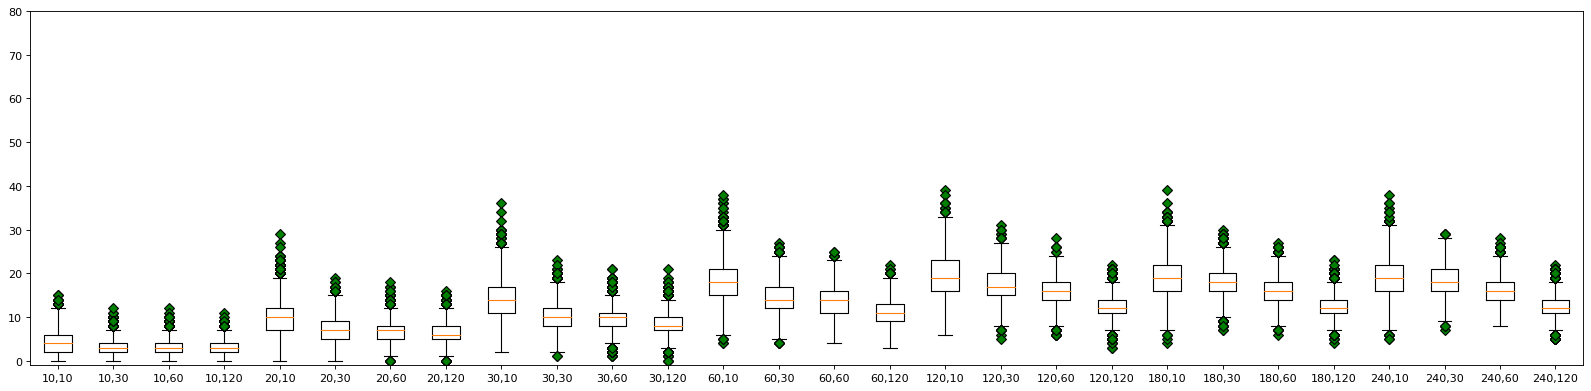

In [45]:
saveFigure = True
simple_boxplot(completed_task_dict, "completedTaskMean_"+results_folder.split("/")[-1], saveFigure)

## Completed areas in general

In [74]:
completed_task_dict = {}

timeout = -1
respawn = -1
for timeout_folder in natsorted(os.listdir(os.path.join(results_folder))):
    print(colored("Timeout folder:", 'blue'),timeout_folder)
    
    parameters = timeout_folder.split("_")
    
    for param in parameters:
        if param.startswith("timeout"):
#             print(param.split("#")[-1])
            timeout = int(param.split("#")[-1]) * 10
            print("\ttimeout:",timeout)
        elif param.startswith("respawn"):
#           print(param.split("#")[-1])
            respawn = int(param.split("#")[-1])
            print("\trespawn:",respawn)
    
#     if timeout == 20 :
#         break
        
    if timeout == -1 :
        print(colored("\tWARNING: wrong timeout folder", 'green'))
        continue
    if respawn == -1 :
        print(colored("\tWARNING: wrong timeout folder", 'green'))
        continue

    completed_task_count = []
    for filename in os.listdir(os.path.join(results_folder, timeout_folder)):
        if filename.endswith("completed_taskLOG.tsv"):
            if not os.path.getsize(os.path.join(results_folder, timeout_folder, filename)) > 0:
                print(colored("\tWARNING, empty file at:" + filename, 'red'))
                completed_task_dict[str(timeout)+","+str(respawn)] = 0
                continue
#             print('\tfilename: ', filename)
            
            df_completedTask = pd.read_csv(os.path.join(results_folder, timeout_folder, filename), sep="\t", header=None)
            completed_task_count += [df_completedTask.shape[0]]
            
    if(len(completed_task_count)!= 100):
        print(colored("\tWARNING, completed_task_count should be 100!", 'red'))
    print(colored("\tlen(completed_task_count)"+str(len(completed_task_count)), 'blue'))
    completed_task_dict[str(timeout)+","+str(respawn)] = completed_task_count
    
            


Timeout folder: TimeoutRespawnExp_2021-06-25_robots#48_timeout#1_respawn#10_redAreas#16_1800#seconds
	timeout: 10
	respawn: 10
	len(completed_task_count)100
Timeout folder: TimeoutRespawnExp_2021-06-25_robots#48_timeout#1_respawn#30_redAreas#16_1800#seconds
	timeout: 10
	respawn: 30
	len(completed_task_count)100
Timeout folder: TimeoutRespawnExp_2021-06-25_robots#48_timeout#1_respawn#60_redAreas#16_1800#seconds
	timeout: 10
	respawn: 60
	len(completed_task_count)100
Timeout folder: TimeoutRespawnExp_2021-06-25_robots#48_timeout#1_respawn#120_redAreas#16_1800#seconds
	timeout: 10
	respawn: 120
	len(completed_task_count)100
Timeout folder: TimeoutRespawnExp_2021-06-25_robots#48_timeout#2_respawn#10_redAreas#16_1800#seconds
	timeout: 20
	respawn: 10
	len(completed_task_count)100
Timeout folder: TimeoutRespawnExp_2021-06-25_robots#48_timeout#2_respawn#30_redAreas#16_1800#seconds
	timeout: 20
	respawn: 30
	len(completed_task_count)100
Timeout folder: TimeoutRespawnExp_2021-06-25_robots#48_t

completedTask_timeout_respawn_study_red


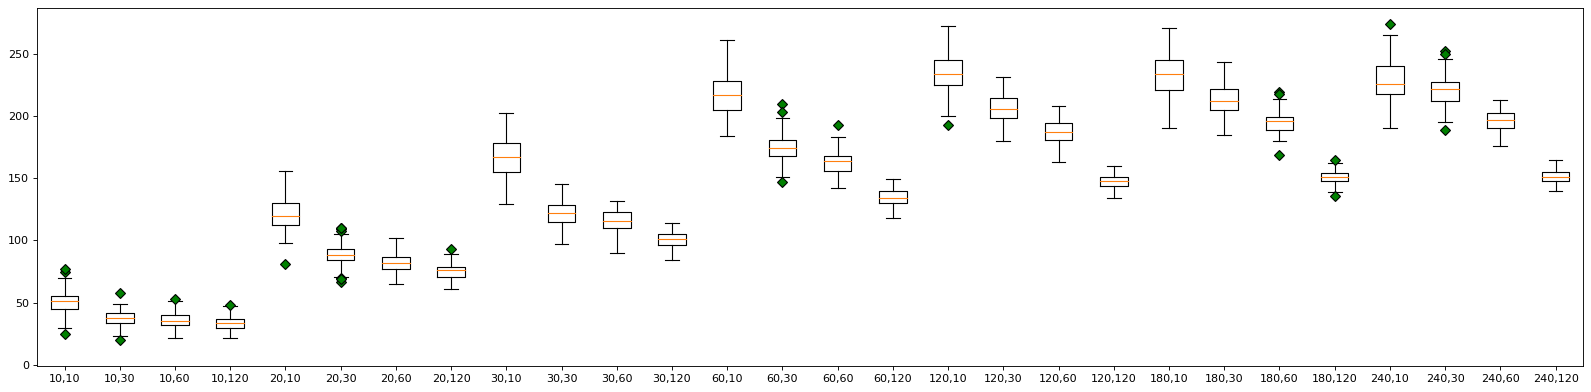

In [75]:
saveFigure = True
figureName = "completedTask_"+results_folder.split("/")[-1]
print(figureName)
simple_boxplot(completed_task_dict, figureName, saveFigure)

In [48]:
df_completedTask = pd.read_csv("/home/luigi/Documents/ARGoS/argos_results_scripts/DHTF/standAlone/results/timeout_respawn_study_blue/TimeoutRespawnExp_2021-06-25_robots#48_timeout#1_respawn#10_redAreas#0_1800#seconds/seed#1_completed_taskLOG.tsv", sep="\t", header=None)
df_completedTask.columns = completed_task_label

In [54]:
df_completedTask.shape[0]

980